# Timing and Plotting

## Agenda

1. Timing
2. Building a timing utility
3. The `timeit` module
4. Drawing plots with `matplotlib`
5. Timing plots
6. Timing examples
    - list indexing
    - linear search
    - binary search
    - insertion sort
7. Takeaways

## 1. Timing

The [`time`](https://docs.python.org/3/library/time.html#module-time) module contains functions for obtaining and interpreting the current system time.

In [1]:
import time
time.time() # seconds since the "epoch"

1716855475.9785762

In [2]:
time.time() // (365 * 24 * 60 * 60)

54.0

By taking start and stop "timestamps", we can measure the runtime of code:

In [4]:
start = time.time()
time.sleep(0.5)
end = time.time()
end - start

0.5007114410400391

## 2. Building a timing utility

We can build a utility function for timing the execution of a passed-in function:

In [11]:
def timeit(fn):
    start = time.time()
    fn()
    end = time.time()
    return end - start

In [20]:
timeit(lambda: sum(range(10_000)))

0.00011873245239257812

In [ ]:
timeit(?)

While using a lambda is one possible approach, it limits us to passing in a function that must be called a certain way (e.g., with no arguments). We can make use of the `eval` function to evaluate an arbitrary string of Python code instead.

In [21]:
eval('1 + 2')   #takes a string of python code and evaluates it

3

In [22]:
eval('sum(range(10_000))')

49995000

In [23]:
def timeit(stmt='pass'):
    start = time.time()
    eval(stmt)
    end = time.time()
    return end - start

In [24]:
timeit('sum(range(10_000))')

0.0001385211944580078

To make timings more stable, we can run the passed-in function multiple times:

In [31]:
def timeit(stmt='pass', number=1):
    total = 0
    for i in range(number):
        start = time.time()
        eval(stmt)
        end = time.time()
        total += end - start
    return total

In [36]:
timeit('sum(range(10_000))', number=100000)

13.98605990409851

## 3. The `timeit` module

The [`timeit`](https://docs.python.org/3/library/timeit.html) module is a built-in library for measuring the execution of code passed in as a string.

In [37]:
import timeit
timeit.timeit('sum(range(100_000))', number=1000)

1.4158564469998964

It also supports passing in "setup" code that is not timed.

In [38]:
timeit.timeit('sum(r)', 
              setup='r = range(10_000)', 
              number=1000)

0.1572741129998576

We can easily use this to gather timings for multiple input values:

In [39]:
[timeit.timeit('sum(r)',
               setup=f'r = range({n})',
               number=1000)
 for n in range(1000, 11_000, 1000)]

[0.02560184300000401,
 0.02347601100018437,
 0.035280409999813855,
 0.05179407399964475,
 0.06163207300005524,
 0.07208159199990405,
 0.14906636500018067,
 0.10888175000036426,
 0.1090220800001589,
 0.22249395400012872]

Sometimes we might want to make use of functions defined in our notebook in the timed/setup code passed to `timeit`. We need to use the `globals` argument for this:

In [40]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [41]:
[fib(n) for n in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [42]:
[timeit.timeit(f'fib({n})',
               number=1000,
               globals=globals()) # "globals()" returns a dict of everything
                                  # defined in this module
 for n in range(1, 15)]

[0.00018280299991602078,
 0.0006170489996293327,
 0.000704388000031031,
 0.0007966899997882138,
 0.0014444270000240067,
 0.0024016659999688272,
 0.004412254000271787,
 0.011184597000010399,
 0.009997230999942985,
 0.016299158000038005,
 0.026963333999901806,
 0.044694217999676766,
 0.07169828199994299,
 0.11168024400012655]

In [43]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import time\ntime.time() # seconds since the "epoch"',
  'time.time() // (365 * 24 * 60 * 60)',
  'time.sleep(0.5)',
  'start = time.time()\ntime.sleep(0.5)\nend = time.time()\nend - start',
  'def timeit(fn):\n    start = time.time()\n    fn()\n    end = time.time()\n    end - start',
  'sum(range(10_000))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'def timeit(fn):\n    start = time.time()\n    fn()\n    end = time.time()\n    return end - start',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(rang

### Magic timing commands

The `%timeit` "magic" notebook command can also be used to time code (though not always as conveniently as the `timeit` module).

In [44]:
%timeit -n 1000 sum(range(10_000))

138 µs ± 28.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
%%timeit -n 1000

total = 0
for n in range(10_000):
    total += n

420 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 4. Drawing plots with `matplotlib`

The [matplotlib library](https://matplotlib.org) supports the creation of all sorts of visualizations. We will use it for drawing simple 2-dimensional plots.

The primary plotting function we will use is `matplotlib.pyplot.plot` ([full documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)), which, when passed two "array-like" objects of equal length, will interpret and plot their contents as x and y axis coordinates. We will generally use tuples, lists, and ranges as array-like objects. Note that generators are *not* considered array-like by matplotlib.

Some examples (note that we use a semicolon after the call to `plot` to hide its return value):

In [46]:
import matplotlib.pyplot as plt
#as clause on import creates a synonym for the import so we don't have to type it all out
import numpy as np
import math

plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

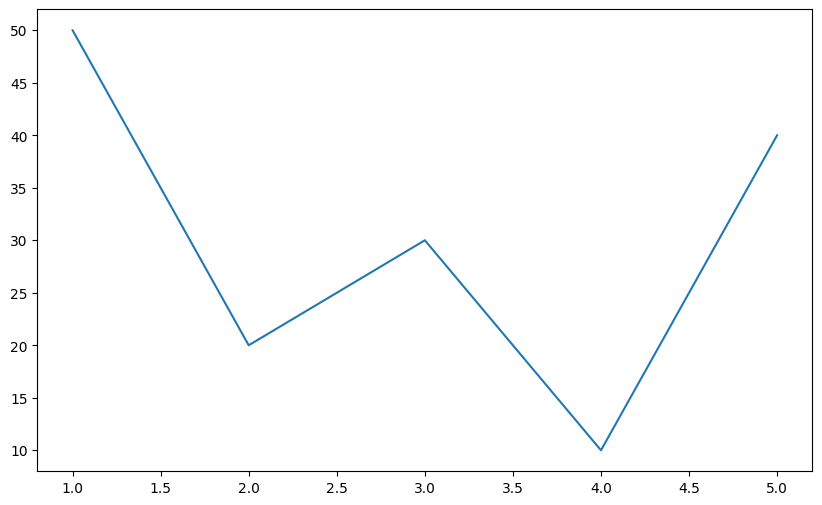

In [47]:
plt.plot([1, 2, 3, 4, 5],        # x-axis vals
         [50, 20, 30, 10, 40]);  # y-axis vals

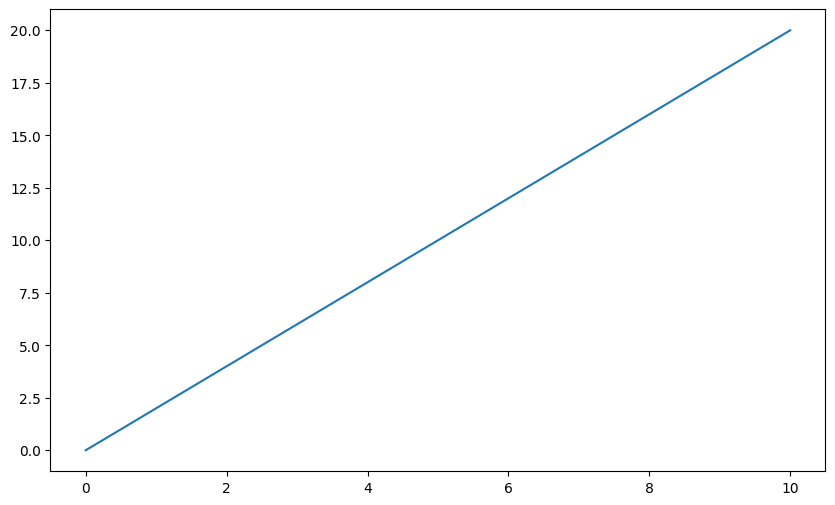

In [48]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys);

We can also provide an optional format string to `plot`, which controls marker, line-style, and color for the plot.

Here's a shortened list of options copied from the [full documentation of `plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot):

**Markers**

  - `.` : point marker
  - `o` : circle marker
  - `s` : square marker
  - `d` : diamond marker

**Line-styles**
 
  - `-` : solid line style
  - `--` : dashed line style
  - `:` : dotted line style

**Colors**

  - `k` : black
  - `r` : red
  - `g` : blue
  - `b` : green
  - `y` : yellow
  - `c` : cyan
  
Here are the above plots with some color and styling (if we omit a line style no connecting line is drawn between data points):

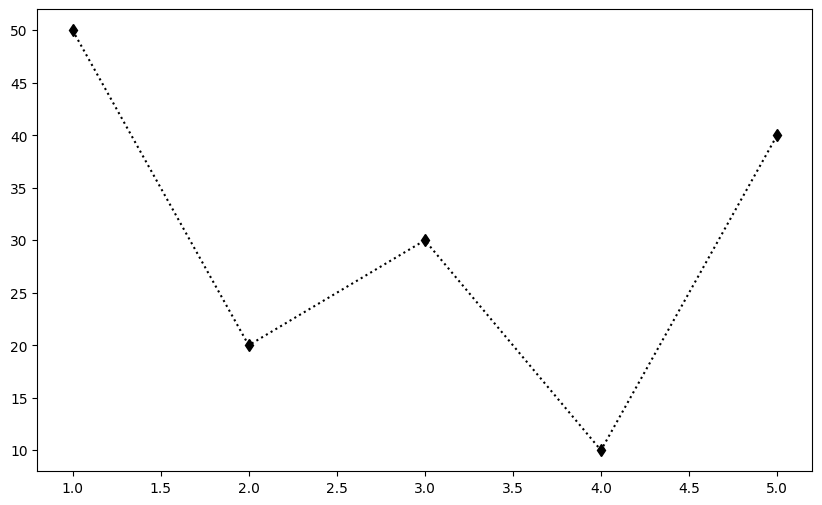

In [49]:
plt.plot([1, 2, 3, 4, 5], 
         [50, 20, 30, 10, 40], 
         'd:k');

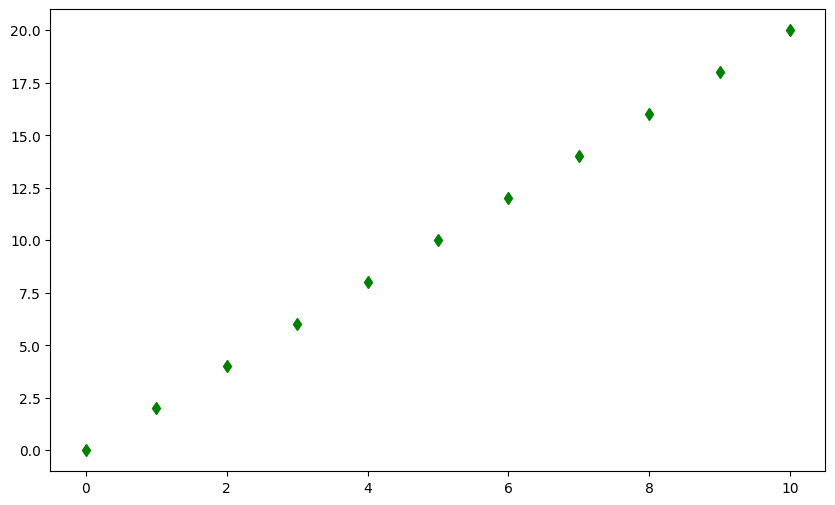

In [51]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys, 'dg'); #omitting the line parameter removes the line from the graph (resulting in scatter plots)

Instead of regular `range` objects, which only allow for integral start/stop/step values, we typically prefer to use the [numpy library](https://numpy.org)'s `arange` and `linspace` functions with matplotlib. `arange` is like `range`, except we can use floating point values for start/stop/step. `linspace` lets us specify start and stop values (both inclusive), and the number of values to return in that interval.

Examples of `arange` and `linspace` calls (note that both functions return numpy arrays, which are iterable and can be passed to `plot`):

In [52]:
np.arange(0.5, 2.5, 0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

In [57]:
np.linspace(10, 20, 41)

array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
       16.75, 17.  , 17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75,
       19.  , 19.25, 19.5 , 19.75, 20.  ])

In [58]:
np.linspace(1, 100_000, 50, dtype=int) # we can specify the data type 
                                       # to coerce values into integers

array([     1,   2041,   4082,   6123,   8164,  10204,  12245,  14286,
        16327,  18368,  20408,  22449,  24490,  26531,  28572,  30612,
        32653,  34694,  36735,  38776,  40816,  42857,  44898,  46939,
        48980,  51020,  53061,  55102,  57143,  59184,  61224,  63265,
        65306,  67347,  69388,  71428,  73469,  75510,  77551,  79592,
        81632,  83673,  85714,  87755,  89796,  91836,  93877,  95918,
        97959, 100000])

`plot` can be called multiple times in the same cell to draw multiple lines in the same chart. Below we use this facility together with `linspace` and a handful of list comprehensions to plot some common runtime complexity bounding functions (more on that soon) over a small interval: 

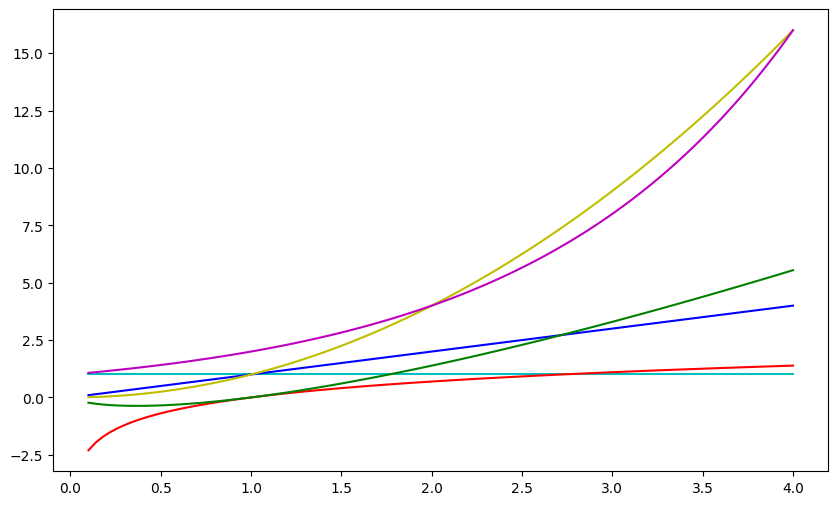

In [61]:
count = 100
xs = np.linspace(0.1, 4, count)
ys_const        = [1] * count
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
ys_linearithmic = [x * math.log(x) for x in xs]
ys_quadratic    = [x**2 for x in xs]
ys_exponential  = [2**x for x in xs]

plt.plot(xs, ys_const, 'c')
plt.plot(xs, ys_log, 'r')
plt.plot(xs, ys_linear, 'b')
plt.plot(xs, ys_linearithmic, 'g')
plt.plot(xs, ys_quadratic, 'y');
plt.plot(xs, ys_exponential, 'm');

## 5. Plotting timings

Plotting timing data collected from functions may help give us a sense of how their runtimes scale with increasing input sizes.

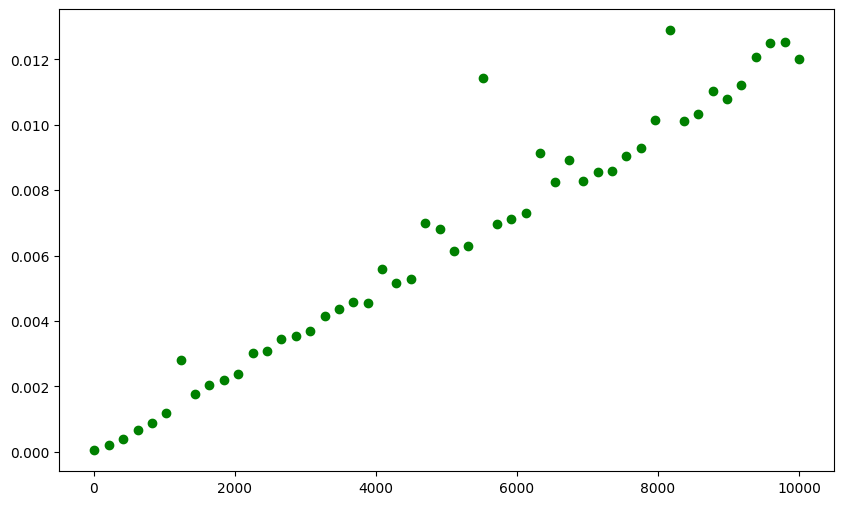

In [64]:
# runtimes for sum for increasing sizes of input

ns = np.linspace(10, 10_000, 50, dtype=int)     #generates a list of values n
ts = [timeit.timeit(f'sum(range({n}))',   #gets a list of times it takes to run the sum finctions 100 times per n
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'og');

Clearly, the runtime of `sum` is directly proportional to the number of values it operates on. 

If we assume a linear relationship, we can compute the average slope between adjacent data points to come up with an line of approximate fit that may help us predict the runtime of `sum`.

In [65]:
total = 0

for i in range(len(ns)-1):
    total += (ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) # slope = rise / run
    
avg_slope = total / (len(ns)-1)

In [66]:
avg_slope

1.197672362148556e-06

It should make sense that for our bounding linear functions, we simply need to pick $c_1$ < slope, and $c_2$ > slope. To be safe, we use the multipliers 0.8 and 1.2 in our plot below (we also plot the line using the unaltered slope for good measure):

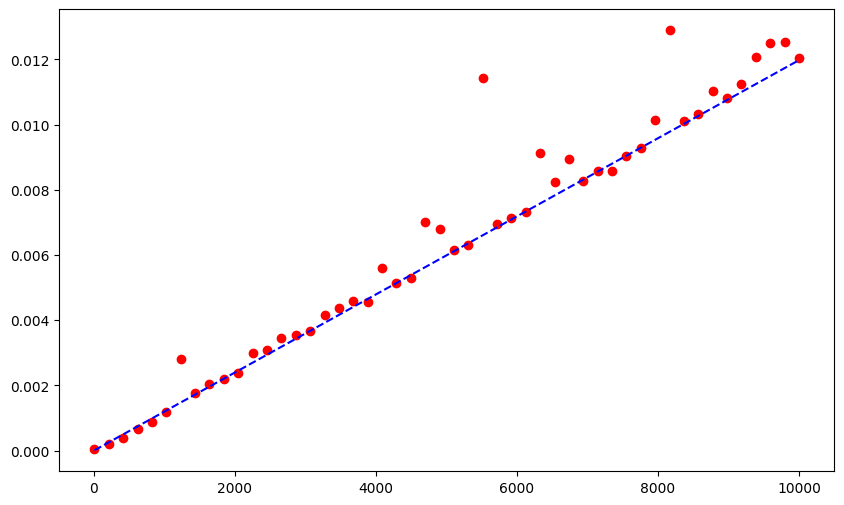

In [67]:
plt.plot(ns, ts, 'or')
plt.plot(ns, [avg_slope*n for n in ns], '--b');

In [68]:
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print(f'Runtime of sum(range({n:>11,})) ~ {avg_slope * n / 100:>5.2f} s')

Runtime of sum(range(          1)) ~  0.00 s
Runtime of sum(range( 10,000,000)) ~  0.12 s
Runtime of sum(range( 20,000,000)) ~  0.24 s
Runtime of sum(range( 30,000,000)) ~  0.36 s
Runtime of sum(range( 40,000,000)) ~  0.48 s
Runtime of sum(range( 50,000,000)) ~  0.60 s
Runtime of sum(range( 60,000,000)) ~  0.72 s
Runtime of sum(range( 70,000,000)) ~  0.84 s
Runtime of sum(range( 80,000,000)) ~  0.96 s
Runtime of sum(range( 90,000,000)) ~  1.08 s
Runtime of sum(range(100,000,000)) ~  1.20 s


We can also use [`polyfit`](https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html) to compute a best-fitting polynomial function of arbitrary degree for our data:

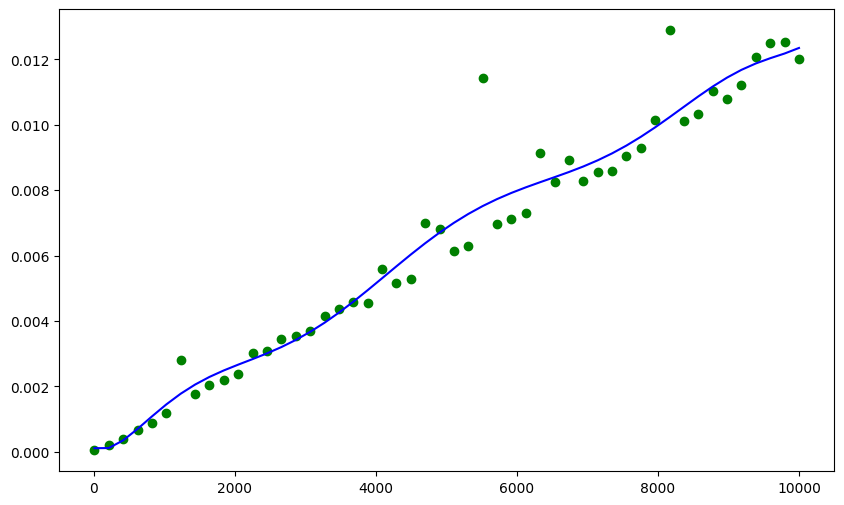

In [72]:
degree = 8
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, ts, 'og')
plt.plot(ns, [p(n) for n in ns], '-b');

Is there a downside to this approach?

In [70]:
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print(f'Runtime of sum(range({n:>11,})) ~ {p(n)/100:.2f} s')

Runtime of sum(range(          1)) ~ -0.00 s
Runtime of sum(range( 10,000,000)) ~ -795719409129725222254555430912.00 s
Runtime of sum(range( 20,000,000)) ~ -816867141081722481099984580116480.00 s
Runtime of sum(range( 30,000,000)) ~ -47144144949969514162991122272485376.00 s
Runtime of sum(range( 40,000,000)) ~ -837523467820346630690870355268993024.00 s
Runtime of sum(range( 50,000,000)) ~ -7802004973887830941394993875601326080.00 s
Runtime of sum(range( 60,000,000)) ~ -48316049716826040031910601319551860736.00 s
Runtime of sum(range( 70,000,000)) ~ -225741428549567546134752035576997740544.00 s
Runtime of sum(range( 80,000,000)) ~ -858162836581708592831676561287402225664.00 s
Runtime of sum(range( 90,000,000)) ~ -2786924688234744336130322377929532637184.00 s
Runtime of sum(range(100,000,000)) ~ -7993268147840970554053334836279743873024.00 s


Choosing an ill-fitting function may result in wildly inaccurate runtime predictions. Worse, inaccuracies are compounded as input sizes grow large!

How do we know what class of function to use (e.g., logarithmic, linear, nth-degree polynomial, exponential) for modeling the runtime behavior of algorithms? 

Can we reliably determine this through empirical observation?

## 6. Timing Examples

### Built-in list indexing

What is the runtime behavior of list-indexing?

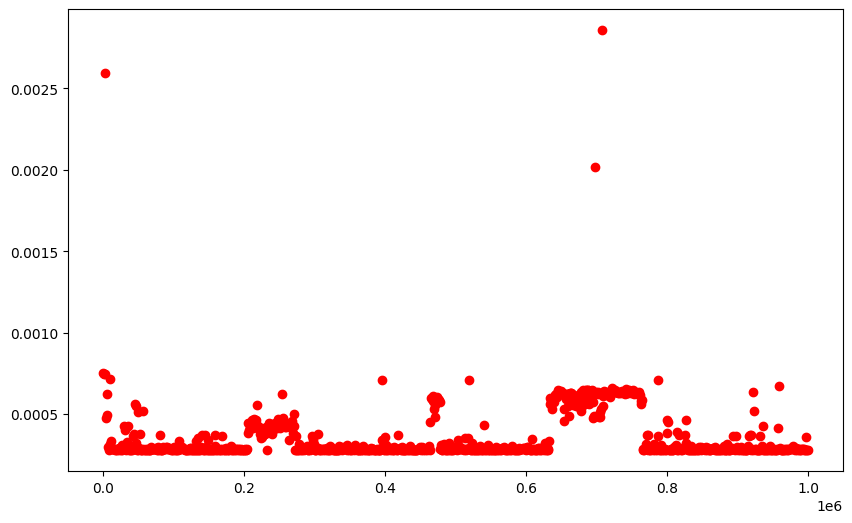

In [76]:
lst = list(range(1_000_000))
ns = np.linspace(0, len(lst), 1000, endpoint=False, dtype=int)
ts = [timeit.timeit(f'_ = lst[{n}]',
                    globals=globals(), 
                    number=10000) 
      for n in ns]

plt.plot(ns, ts, 'or');

Observation: accessing an element in a list by index -- *regardless of where in the list the element is located* -- takes a uniform/constant amount of time.

How? **A Python list uses an array as its backing data store.** Every "slot" in this array is a reference (i.e., a fixed-width address) to an object, and to access an element at a particular index, the underlying code:

1. Computes an *offset* into the array by multiplying the index by the size of a reference
2. Adds the computed offset to the *base address* of the array, giving us the address of the reference
3. Accesses the reference and uses it to load the associated element

Each of the steps above can be performed in constant time.

![](../images/array-indexing.jpg)

### Linear Search

What is the runtime behavior of searching for an element in an unsorted list?

In [77]:
def contains(lst, x):
    for items in lst:
        if list == x:
            return True
    else:
        return False

In [78]:
import random
lst = list(range(100))
random.shuffle(lst)

contains(lst, 10)

False

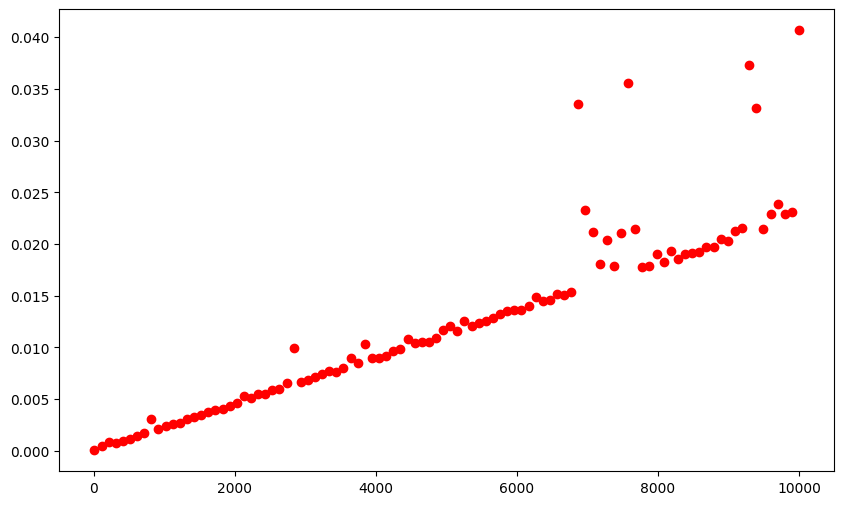

In [81]:
# runtimes when searching for a present element in a randomly shuffled list

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup=f'lst=list(range({n})); random.shuffle(lst)',
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

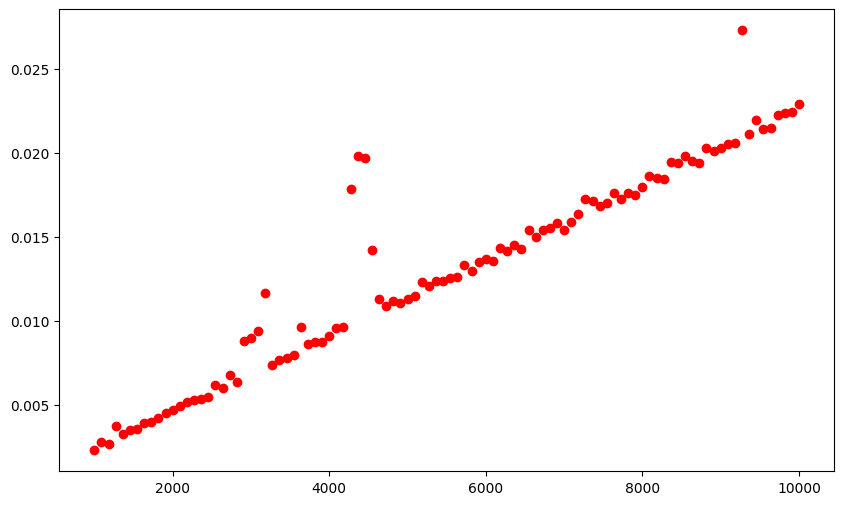

In [82]:
# runtimes when searching for an element that is not present

ns = np.linspace(1_000, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, -1)', 
                    setup=f'lst=list(range({n}))',
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

### Binary search

What is the runtime behavior of searching for an element in a sorted list using binary search?

In [83]:
def contains(lst, x):
    low = 0
    hi = len(lst) - 1
    while low <= hi:
        mid = (hi + low) // 2
        if lst[mid] == x:
            return True
        elif lst[mid] > x:
            hi = mid - 1
        else: #lst[mid] < x
            low = mid + 1
    else:
        return False



In [86]:
lst = list(range(1000))
contains(lst, 100)

True

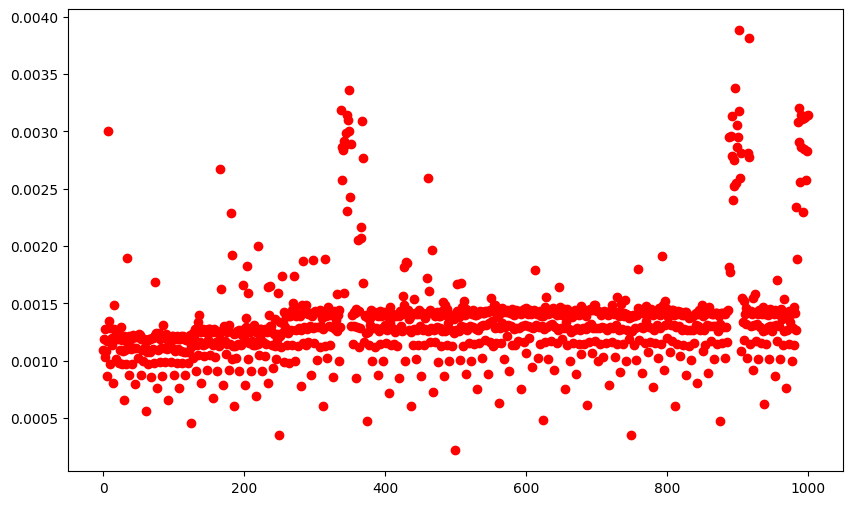

In [89]:
# runtimes when searching for different values in a fixed-size list

lst = list(range(1000))
ns = range(1000)
ts = [timeit.timeit(stmt=f'contains(lst, {x})', 
                    globals=globals(), 
                    number=1000)
      for x in range(1000)]

plt.plot(ns, ts, 'or');

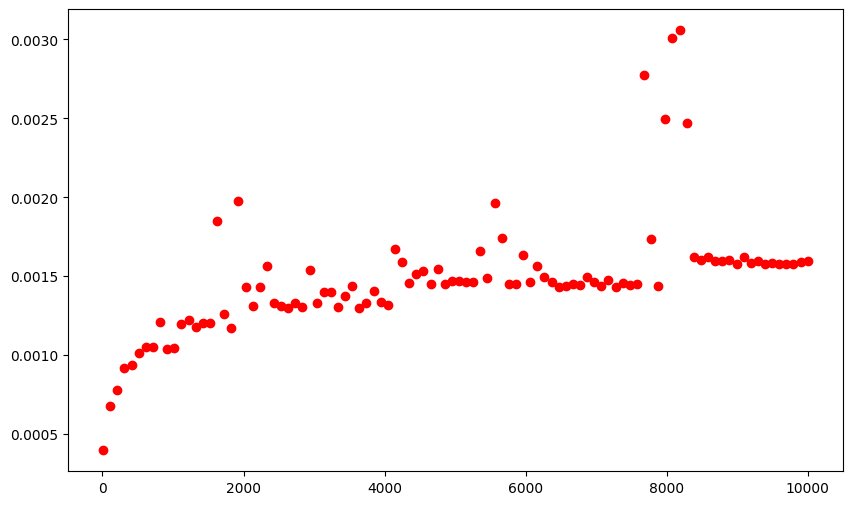

In [94]:
# runtimes when searching for an edge-value in lists of increasing size

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', #looking for 0 will always take the longest to look for so we get the run time complexity
                    setup=f'lst=list(range({n}))',
                    globals=globals(),
                    number=1000)
      for n in ns]

plt.plot(ns, ts, 'or');

### Insertion sort

What is the runtime behavior of insertion sort?

In [104]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j] < lst[j-1]:
                lst[j], lst[j-1] = lst[j-1], lst[j]
            else:
                break

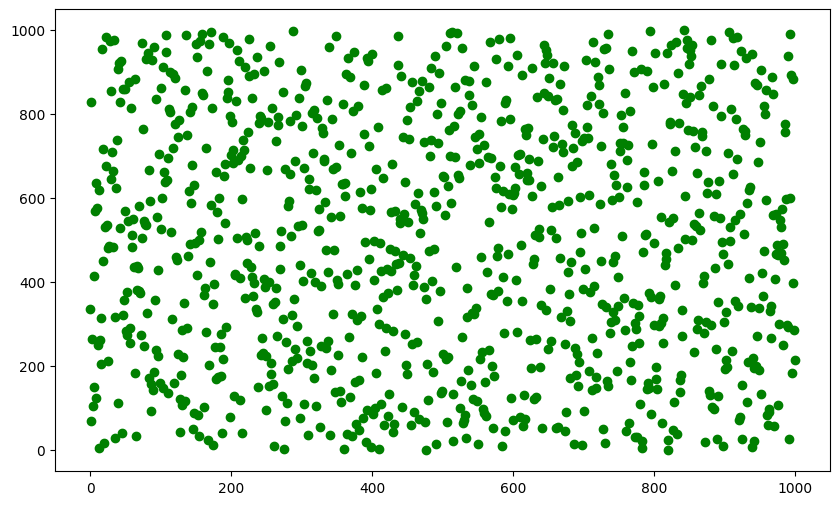

In [105]:
import random
lst = list(range(1000))
random.shuffle(lst)
plt.plot(lst, 'og');

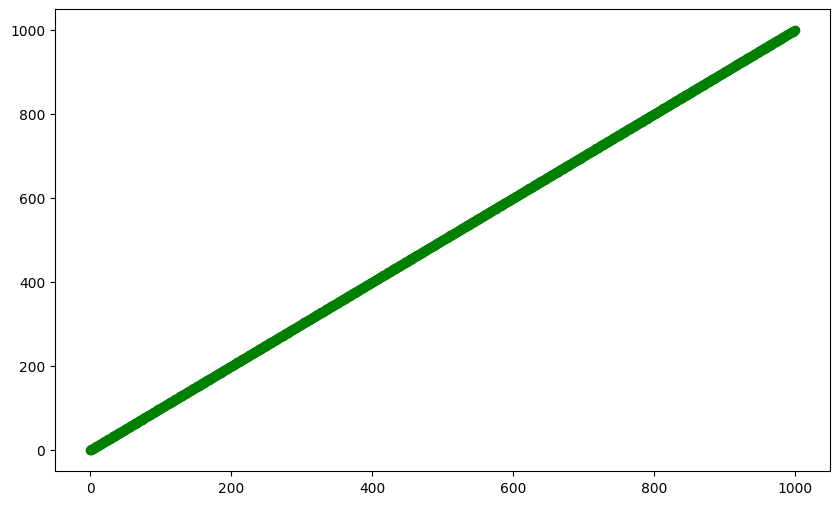

In [106]:
insertion_sort(lst)
plt.plot(lst, 'og');

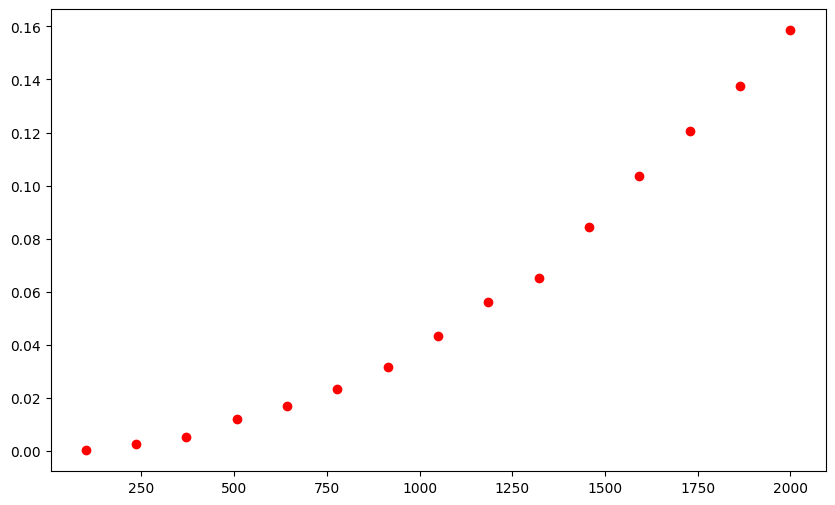

In [108]:
# runtimes for a randomized list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup=f'lst=list(range({n})); random.shuffle(lst)',
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

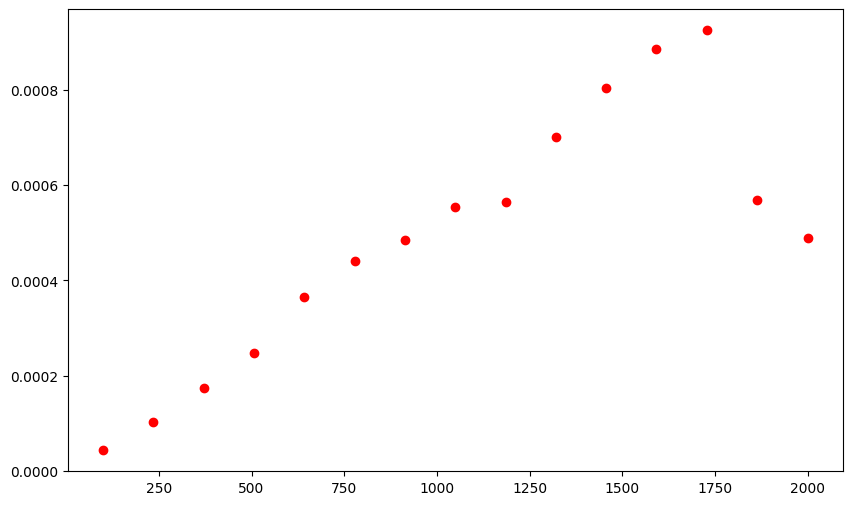

In [112]:
# runtimes for an already sorted list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup=f'lst=list(range({n}))',
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

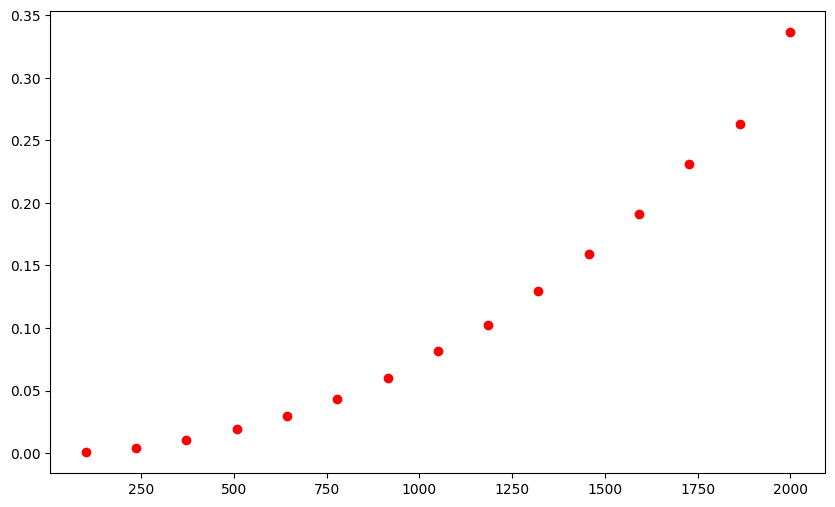

In [113]:
# runtimes for a reversed list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup=f'lst=list(reversed(range({n})))',
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

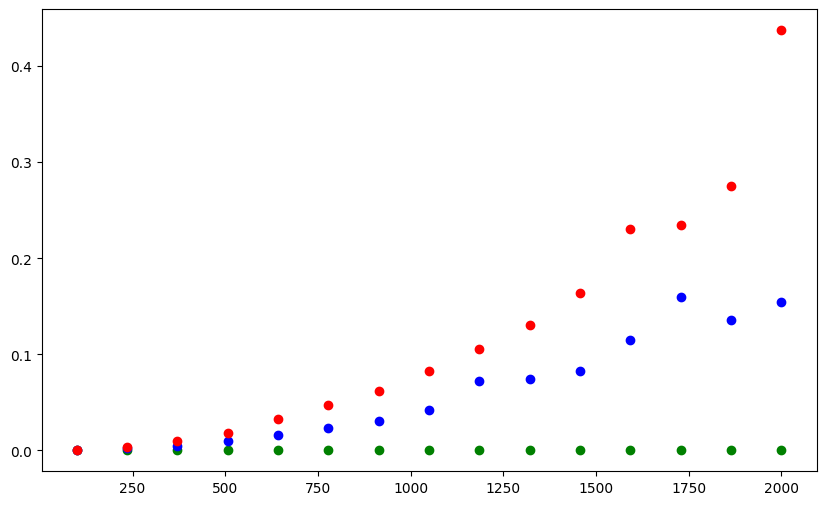

In [123]:
# above runtimes superimposed

ns = np.linspace(100, 2000, 15, dtype=int)
ts1 = [timeit.timeit('insertion_sort(lst)',
                     setup=f'lst=list((range({n})))',
                     globals=globals(),
                     number=1)
       for n in ns]
ts2 = [timeit.timeit('insertion_sort(lst)',
                     setup=f'lst=list(range({n})); random.shuffle(lst)',
                     globals=globals(),
                     number=1)
       for n in ns]

ts3 = [timeit.timeit('insertion_sort(lst)',
                     setup=f'lst=list(reversed(range({n})))',
                     globals=globals(),
                     number=1)
       for n in ns]

plt.plot(ns, ts1, 'og');
plt.plot(ns, ts2, 'ob');
plt.plot(ns, ts3, 'or');

## 7. Takeaways

- timing and plotting libraries allow us to systematically measure and visualize the runtime behavior of algorithms over different inputs
- different characteristics of input (e.g., shuffled, ordered, reversed) can have a profound impact on the runtime of algorithms
- empirical runtime measurements do not always paint a clear, accurate, or consistent picture of the long-term runtime behavior of a function
- choosing the wrong class of function to describe the runtime behavior of an algorithm can result in disastrously wrong predictions
- timing results are useful, but we need a more systematic and rigorous way of describing and comparing the runtime behavior of algorithms!